**How to predict the breast cancer?** \
Here we apply machine learning algorithm to solve this problem.\
Data source: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)



### Importing the library

In [1]:
import pandas as pd
import warnings  
warnings.filterwarnings("ignore") 

### Importing the dataset

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/MySideProject/breast_cancer_logistic_regression/data.csv")
# Explore dataset features and values 
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dataset.shape

(569, 33)

From the table above, we found (1) **id** feature could be ignored; (3)**diagonois** feature is classification label; (3)**Unnamed:32**, the last column, includes NaN that we dont need.

So, drop these three features.

In [5]:
droplist = ['id','diagnosis', 'Unnamed: 32']
X = dataset.drop(droplist, axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = dataset.diagnosis

In [7]:
# Find out whether the dataset has missing value
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Luckily, the other features has no null values.

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

X features are all numerical. Next, we will check data distribution.

In [9]:
# check X desriptive statistics
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


It seems that three main feature groups: mean, se and  worst. And the value ranges are highly different, we need to transform these values later.

### Data Visualization



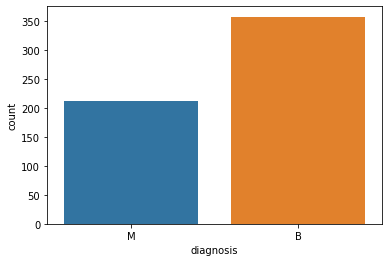

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# let's get the frequency of cancer stage
# y = dataset.diagnosis
sns.countplot(y)

Show the data distribution:
- **Violin plot**: It is similar to a box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.   
- **Swarm plot**: Draw a categorical scatterplot with 
non-overlapping points.

Before violin and swarm plot we need to **normalization or standardization**. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

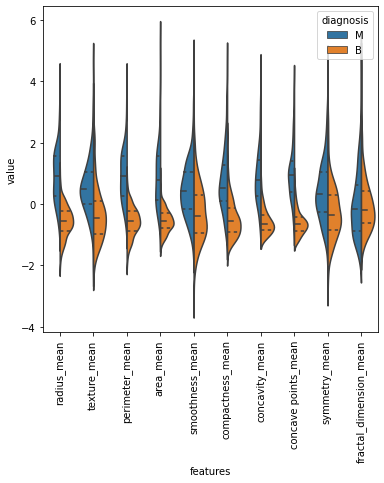

In [11]:
# Stardardization. 
# Method 1:
from sklearn.preprocessing import StandardScaler
X_stand = X.copy()
X_columns = X.columns
for i in X_columns:
  # fit on X dataset columns
  scale = StandardScaler().fit(X_stand[[i]])
  # transform X dataset
  X_stand[i] = scale.transform(X_stand[[i]])

# violin plot 
# first ten features
features_mean = X_stand.iloc[:,0:10]
# create dataframe only included y and first ten features
data = pd.concat([y, features_mean], axis=1)
# data melt
data = pd.melt(data, id_vars="diagnosis",
                     var_name = "features",
                     value_name = "value")
plt.figure(figsize=(6,6))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data ,split=True, inner="quart")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

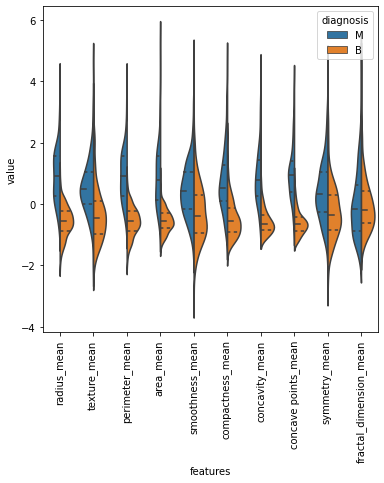

In [12]:
# Stardardization 
# Method 2: 
data_n_2 = (X - X.mean()) / (X.std())              
data = pd.concat([y, data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(6,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Lets interpret the plot above together. For example, in **texture_mean** feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in **fractal_dimension_mean** feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

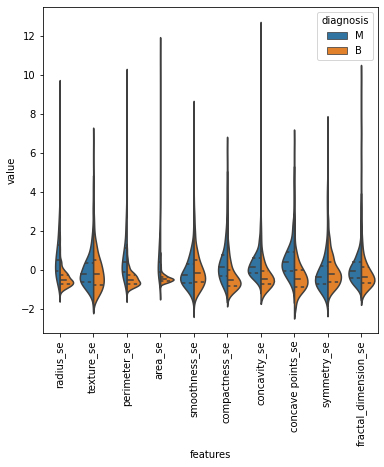

In [13]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(6,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

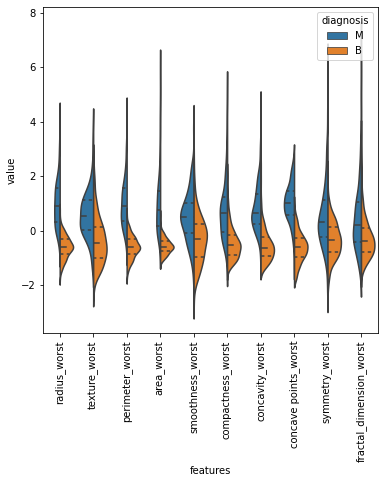

In [14]:
# Third ten features
data = pd.concat([y,data_n_2.iloc[:,20:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(6,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

From the plot2 above, variable of **concavity_worst** and **concave point_wors**t looks like similar but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. Look at this in **joint plot** below, it is really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

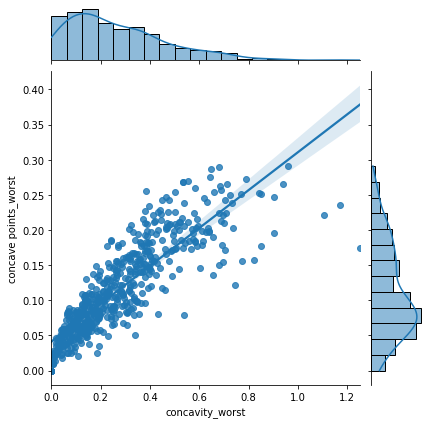

In [15]:
sns.jointplot(x= X.loc[:,'concavity_worst'], y = X.loc[:,'concave points_worst'], kind="reg")

What about three or more feauture comparision ? For this purpose we can use **pair grid plot**. And we discover one more thing **radius_worst, perimeter_worst and area_worst** are correlated as it can be seen pair grid plot. We definetely use these discoveries for feature selection.

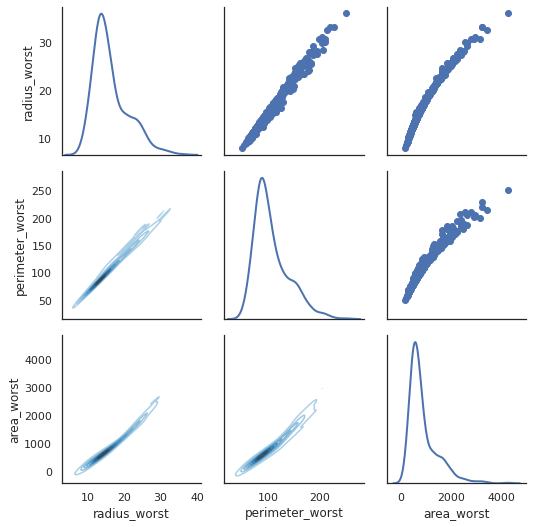

In [16]:
# PairGrid: It uses different pair of variable for each subplot.
sns.set(style="white")
df = X.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=2)  # kernel density estimate (KDE) plot

Swarm plot: lets see more discovery.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

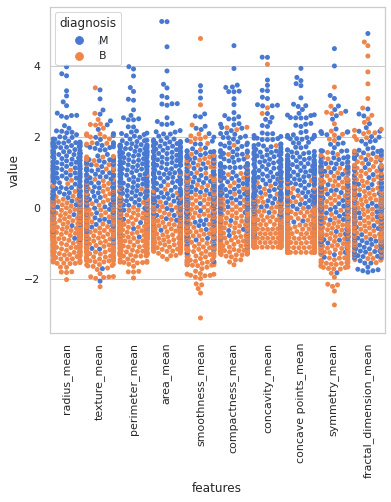

In [17]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(6,6))
import time
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

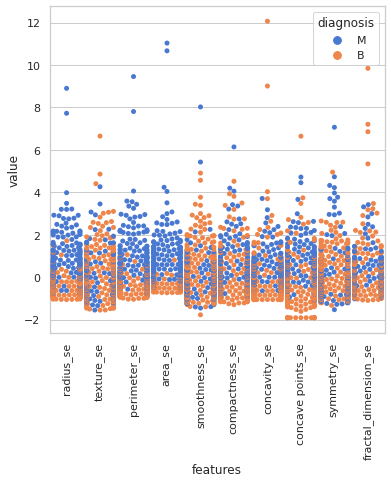

In [18]:
# feature_se
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(6,6))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  19.400132656097412  s


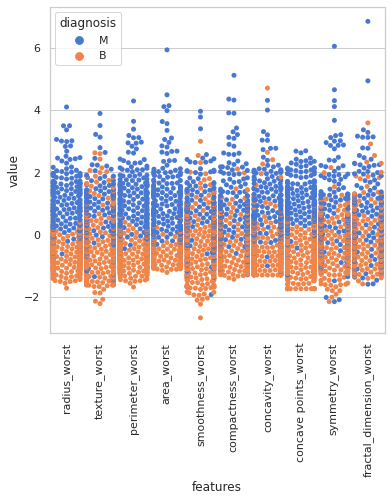

In [19]:
# feature_worst
data = pd.concat([y,data_n_2.iloc[:,20:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(6,6))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

**area_worst** in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, smoothness_se in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

**What if we want to observe all correlation between features?** 

My note \
**annot**: If true, write the data in each cell.\
**fmt**: String formatting code to use when adding annotations.\
**ax**: matplotlib Axes, Axes in which to draw the plot, otherwise use the currently-active Axes.

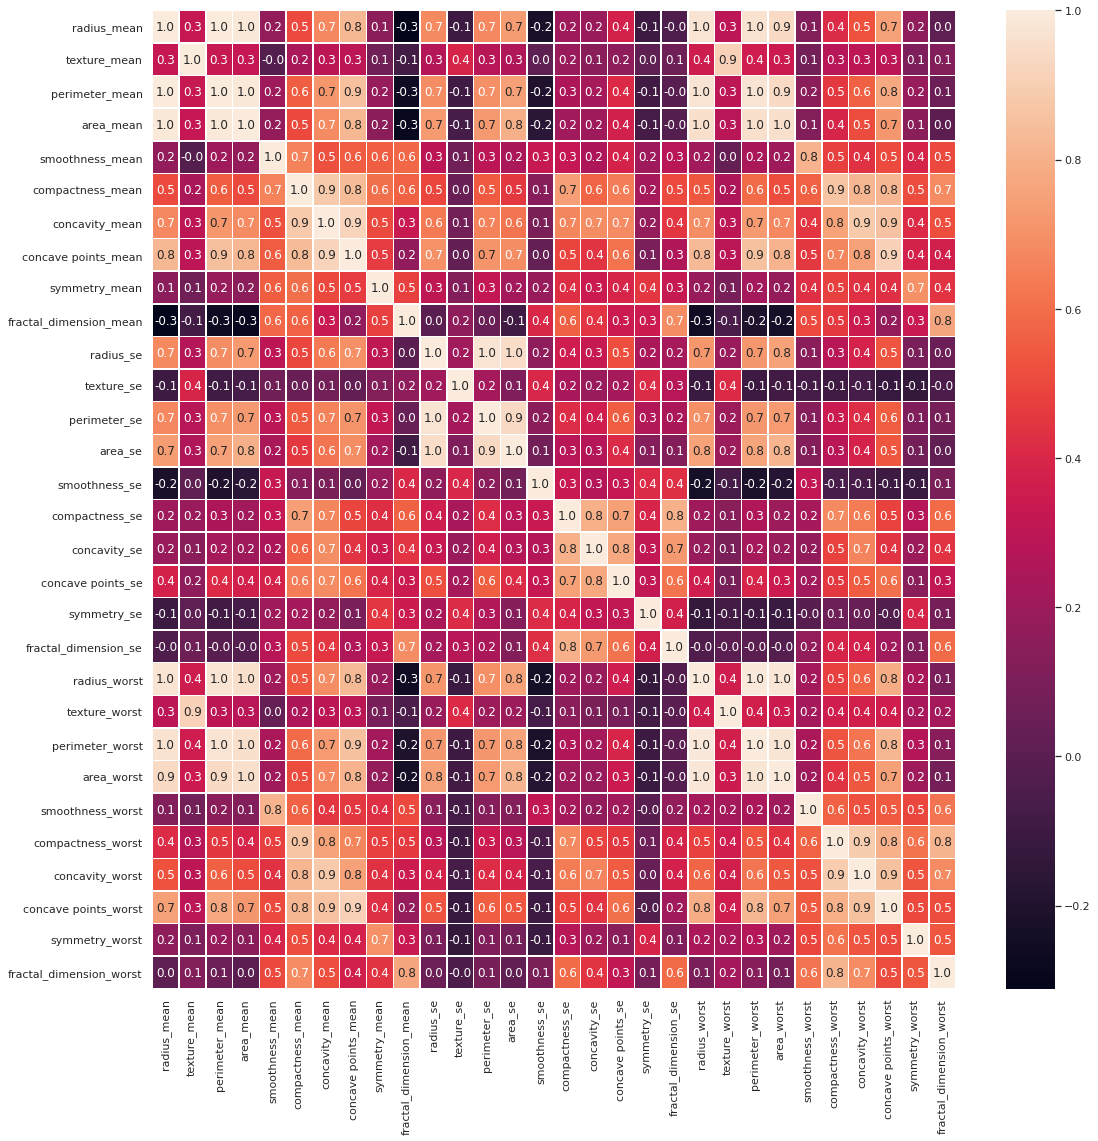

In [20]:
# correlation heatmap
# sns.heatmap(X.corr())
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


### Feature Selection and Training Model



- As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only **area_mean**.
- Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose **concavity_mean**.
-  radius_se, perimeter_se and area_se are correlated and I only use **area_se**. 
- radius_worst, perimeter_worst and area_worst are correlated so I use **area_worst**. 
- Compactness_worst, concavity_worst and concave points_worst so I use **concavity_worst**. 
- Compactness_se, concavity_se and concave points_se so I use **concavity_se**. 
- texture_mean and texture_worst are correlated and I use **texture_mean**. 
- area_worst and area_mean are correlated, I use **area_mean**.


In [21]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
 # do not modify x, we will use it later 
X_1 = X.drop(drop_list1, axis = 1 )       
X_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

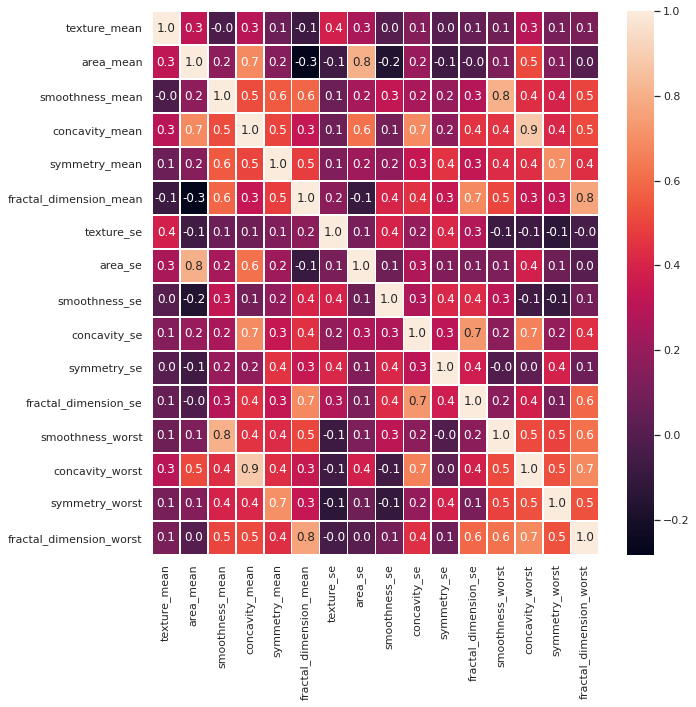

In [22]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, we choose our features but did we choose correctly ? Lets use the following models to find accuracy. 

### Splitting the dataset into Training set and Test set

In [23]:
# Split the dataset: scikit-learn library!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.2, random_state = 0)

### 1. Training the models (Logistics, SVM, KNN, Random Forest) 
### 2. Predict the model
### 3. Estimate the Accuracy


In [24]:
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [25]:
# Logistic Regression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_lr = metrics.accuracy_score(y_pred, y_test)
acc_lr.round(3)


0.956

In [26]:
# SVM
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_svc = metrics.accuracy_score(y_pred, y_test)
acc_svc.round(3)

0.877

In [27]:
# KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_knn = metrics.accuracy_score(y_pred, y_test)
acc_knn.round(3)

0.904

In [28]:
# Random Forest 
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_rfc = metrics.accuracy_score(y_pred, y_test)
acc_rfc.round(3)

0.947

### Computing the accuracy with k-Fold Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score

In [32]:
# Choose Logistic Regression for cross validation
cv_lg = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Logistic Accuracy:{:.2f}%".format(cv_lg.mean()*100))
print("Standar Deviation:{:.2f}%".format(cv_lg.std()*100))

Logistic Accuracy:94.38%
Standar Deviation:0.89%


In [31]:
# Choose Random Forest for cross validation
cv_rfc = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print("Random Forest Accuracy:{:.2f}%".format(cv_rfc.mean()*100))
print("Standar Deviation:{:.2f}%".format(cv_rfc.std()*100))

Random Forest Accuracy:96.14%
Standar Deviation:2.33%
